In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  

### 데이터 불러오기

In [2]:
df = pd.read_csv("C:/Users/GBOOK/Codeit/초급프로젝트/02_data/03_따릉이/강남구_대여소별_시간대별_공공자전거.csv", encoding='cp949')

In [3]:
df = df.drop(columns='Unnamed: 0')

In [4]:
df.head()

,일시,대여소 번호,보관소(대여소)명,시간대,거치대수량,자치구,거치대수
0,2023-01-01,2301,2301. 현대고등학교 건너편,0,1,강남구,10
1,2023-01-01,2302,2302. 교보타워 버스정류장(신논현역 3번출구 후면),0,7,강남구,10
2,2023-01-01,2303,2303. 논현역 10번출구,0,2,강남구,15
3,2023-01-01,2304,2304. 대현그린타워,0,0,강남구,10
4,2023-01-01,2305,2305. MCM 본사 직영점 앞,0,4,강남구,6


### 강남구 따릉이 수요지수 top10 대여소 확인

In [5]:
# 원본데이터 복사해서 작업진행
gangnamgu = df.copy()

#### 거치대수량 0 -> 공사중으로 폐쇄된 대여소 삭제

In [6]:
list_0 = ['2316. 삼성역 8번출구', '2322. 삼성역 3번 출구', '2355. 삼성역 5~6번 출구 사이', '3603. 삼성역 2번출구', '3605. 봉은사역6번출구(현대아이파크타워앞)']

gangnamgu = gangnamgu[~gangnamgu['보관소(대여소)명'].isin(list_0)]

In [7]:
# 수요지수 TOP10 대여소 선별
gangnamgu_10 = gangnamgu.groupby(['보관소(대여소)명']).mean(numeric_only=True)[['거치대수량','거치대수']]
gangnamgu_10['수요지수'] = (gangnamgu_10['거치대수'] - gangnamgu_10['거치대수량'])/gangnamgu_10['거치대수']
gangnamgu_10.sort_values(by='수요지수',ascending=False).head(10)

,거치대수량,거치대수,수요지수
보관소(대여소)명,,,
2391. 구룡터널 입구(개포1단지아파트),0.976192,7.0,0.860544
2333. 양재역 3번출구 주변,2.473226,15.0,0.835118
2329. 르네상스호텔사거리 역삼지하보도 2번출구,1.722620,10.0,0.827738
4915. 영동중앙교회 버스정류장,1.087290,6.0,0.818785
2357. 르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞),1.841443,10.0,0.815856
2398. 더라움,1.984765,10.0,0.801523
2334. 삼호아파트 2동 ( 간선도로),2.390666,12.0,0.800778
2353. 강남구청역 2번출구 뒤,2.053509,10.0,0.794649
2354. 청담역 2번출구,1.037545,5.0,0.792491


#### 수요지수 상위 10 대여소명

In [8]:
gangnamgu_10.sort_values(by='수요지수',ascending=False).head(10).index

Index(['2391. 구룡터널 입구(개포1단지아파트)', '2333. 양재역 3번출구 주변',
       '2329. 르네상스호텔사거리 역삼지하보도 2번출구', '4915. 영동중앙교회 버스정류장',
       '2357. 르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞)', '2398. 더라움',
       '2334. 삼호아파트 2동 ( 간선도로)', '2353. 강남구청역 2번출구 뒤', '2354. 청담역 2번출구',
       '2417.선정릉 디캠프(D,CAMP)앞'],
      dtype='object', name='보관소(대여소)명')

### 그래프 시각화를 위한 group 재설정

In [9]:
gangnamgu_df = gangnamgu.groupby(['보관소(대여소)명', '시간대']).mean(numeric_only=True)[['거치대수량','거치대수']]
gangnamgu_df['수요지수'] = (gangnamgu_df['거치대수'] - gangnamgu_df['거치대수량'])/gangnamgu_df['거치대수']

In [10]:
# 강남구에 대여소는 총 166개 존재함
gangnamgu_df

거치대수량  거치대수      수요지수
보관소(대여소)명        시간대                           
2301. 현대고등학교 건너편 0    13.820198  10.0 -0.382020
                 1    13.729679  10.0 -0.372968
                 2    13.644108  10.0 -0.364411
                 3    13.672015  10.0 -0.367202
                 4    13.618800  10.0 -0.361880
...                         ...   ...       ...
4930. 학여울역 1번출구  19    7.761044  10.0  0.223896
                 20    7.797189  10.0  0.220281
                 21    7.897590  10.0  0.210241
                 22    7.941767  10.0  0.205823
                 23    7.983903  10.0  0.201610

[3984 rows x 3 columns]

### index 초기화

In [11]:
gangnamgu_df.reset_index(inplace=True)

In [14]:
gangnamgu_df

,보관소(대여소)명,시간대,거치대수량,거치대수,수요지수
0,2301. 현대고등학교 건너편,0,13.820198,10.0,-0.382020
1,2301. 현대고등학교 건너편,1,13.729679,10.0,-0.372968
2,2301. 현대고등학교 건너편,2,13.644108,10.0,-0.364411
3,2301. 현대고등학교 건너편,3,13.672015,10.0,-0.367202
4,2301. 현대고등학교 건너편,4,13.618800,10.0,-0.361880
...,...,...,...,...,...
3979,4930. 학여울역 1번출구,19,7.761044,10.0,0.223896
3980,4930. 학여울역 1번출구,20,7.797189,10.0,0.220281
3981,4930. 학여울역 1번출구,21,7.897590,10.0,0.210241
3982,4930. 학여울역 1번출구,22,7.941767,10.0,0.205823


### 그래프 시각화

In [12]:
places = ['2391. 구룡터널 입구(개포1단지아파트)', '2333. 양재역 3번출구 주변',
       '2329. 르네상스호텔사거리 역삼지하보도 2번출구', '4915. 영동중앙교회 버스정류장',
       '2357. 르네상스호텔사거리 역삼지하보도 3번출구 앞 (더 오번 빌딩 명동칼국수 앞)', '2398. 더라움',
       '2334. 삼호아파트 2동 ( 간선도로)', '2353. 강남구청역 2번출구 뒤', '2354. 청담역 2번출구',
       '2417.선정릉 디캠프(D,CAMP)앞']

### 단일그래프 확인

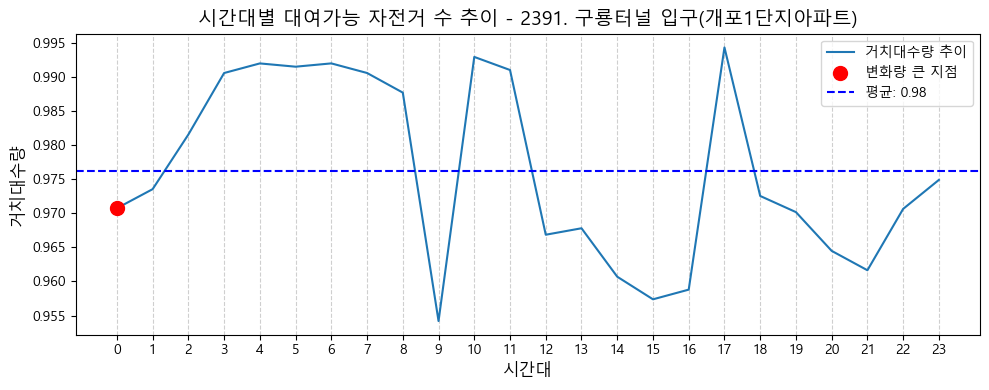

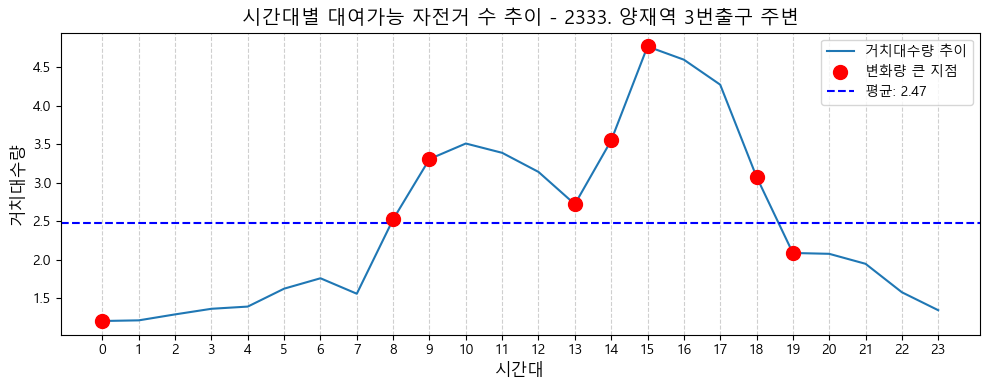

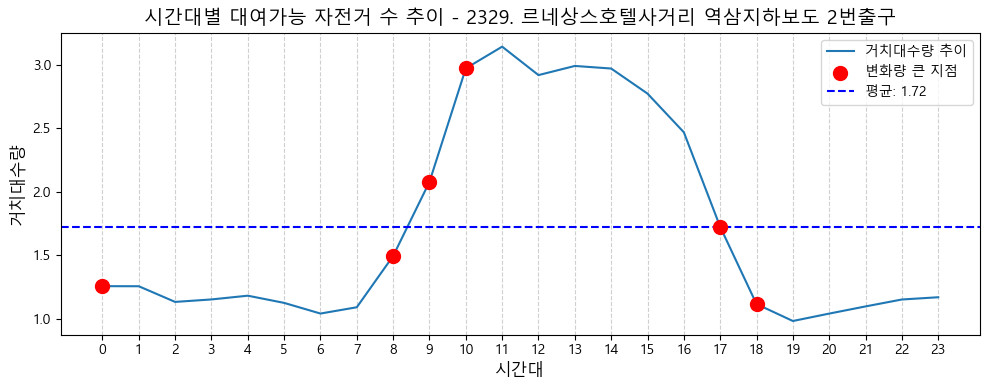

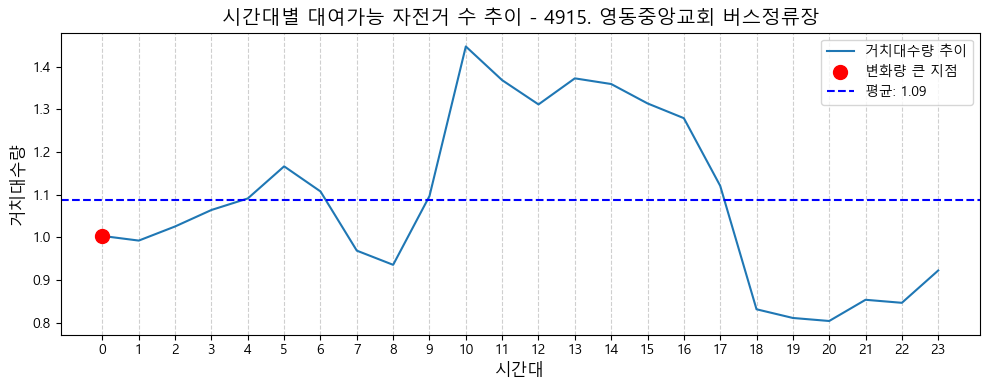

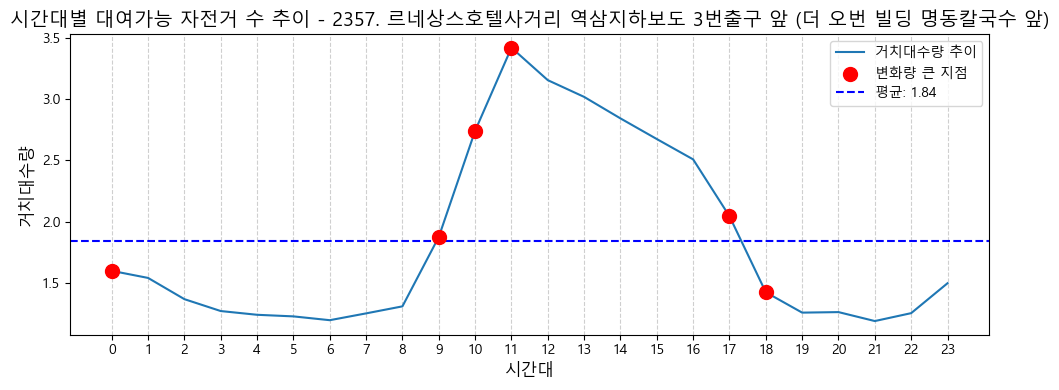

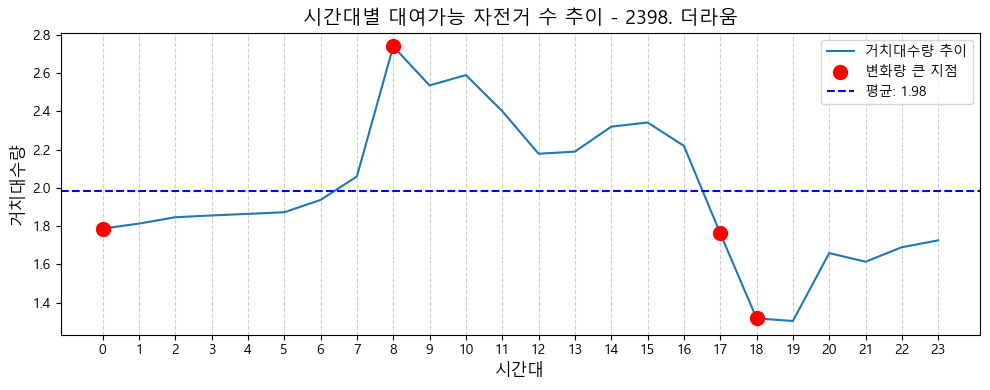

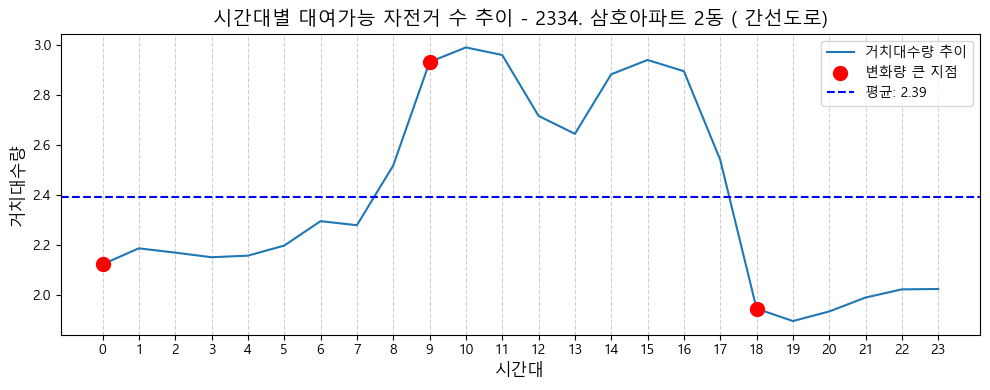

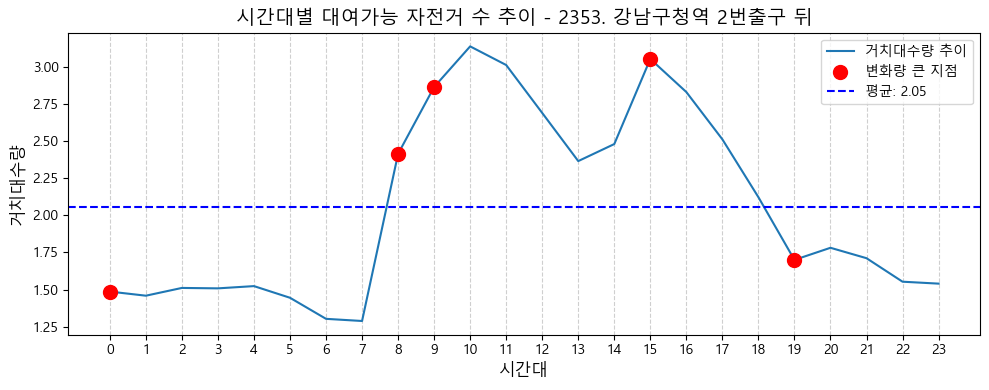

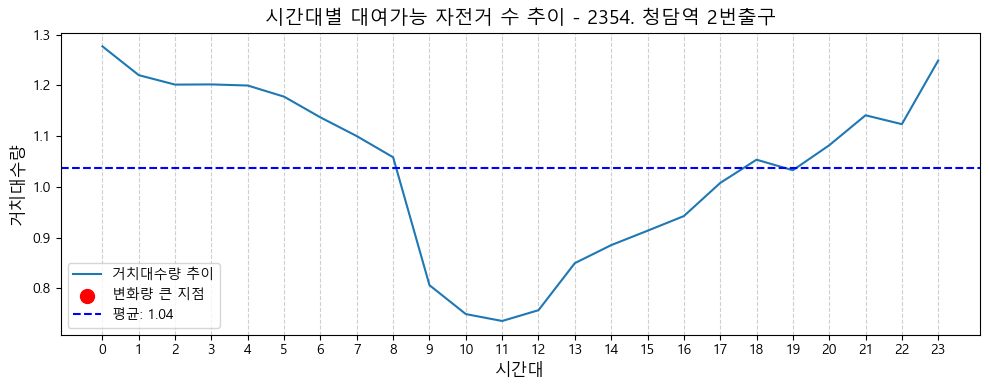

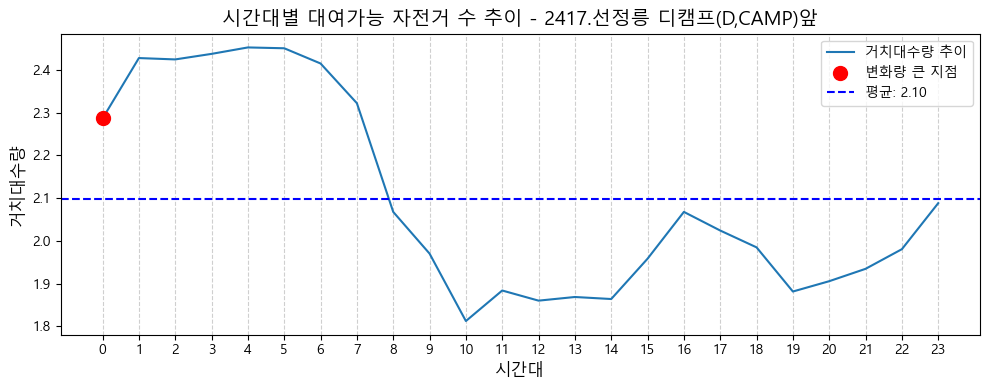

In [13]:
for place in places:
    # 데이터 필터링 및 복사
    plot_df = gangnamgu_df[gangnamgu_df['보관소(대여소)명'] == place].copy()
    plot_df["변화량"] = gangnamgu_df["거치대수량"].diff().fillna(0).abs()

    # 변화량 기준 초과 데이터
    threshold = 0.4  # 하이라이트 기준 점
    highlight = plot_df[plot_df["변화량"] > threshold]

    # 그래프 생성
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=plot_df, x='시간대', y='거치대수량', label='거치대수량 추이')

    # 강조점 추가
    plt.scatter(
        highlight["시간대"],
        highlight["거치대수량"],
        color="red",
        label="변화량 큰 지점",
        s=100,  # 점 크기
        zorder=3
    )

    # y의 평균선 추가
    y_mean = plot_df["거치대수량"].mean()
    plt.axhline(y=y_mean, color="blue", linestyle="--", label=f'평균: {y_mean:.2f}')

    # 스타일링
    plt.xticks(range(0, 24))  # X축 눈금 설정
    plt.title(f'시간대별 대여가능 자전거 수 추이 - {place}', fontsize=14)
    plt.xlabel('시간대', fontsize=12)
    plt.ylabel('거치대수량', fontsize=12)
#     plt.ylim(0, 15)  # y축 범위 고정
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


#### 다중그래프 확인

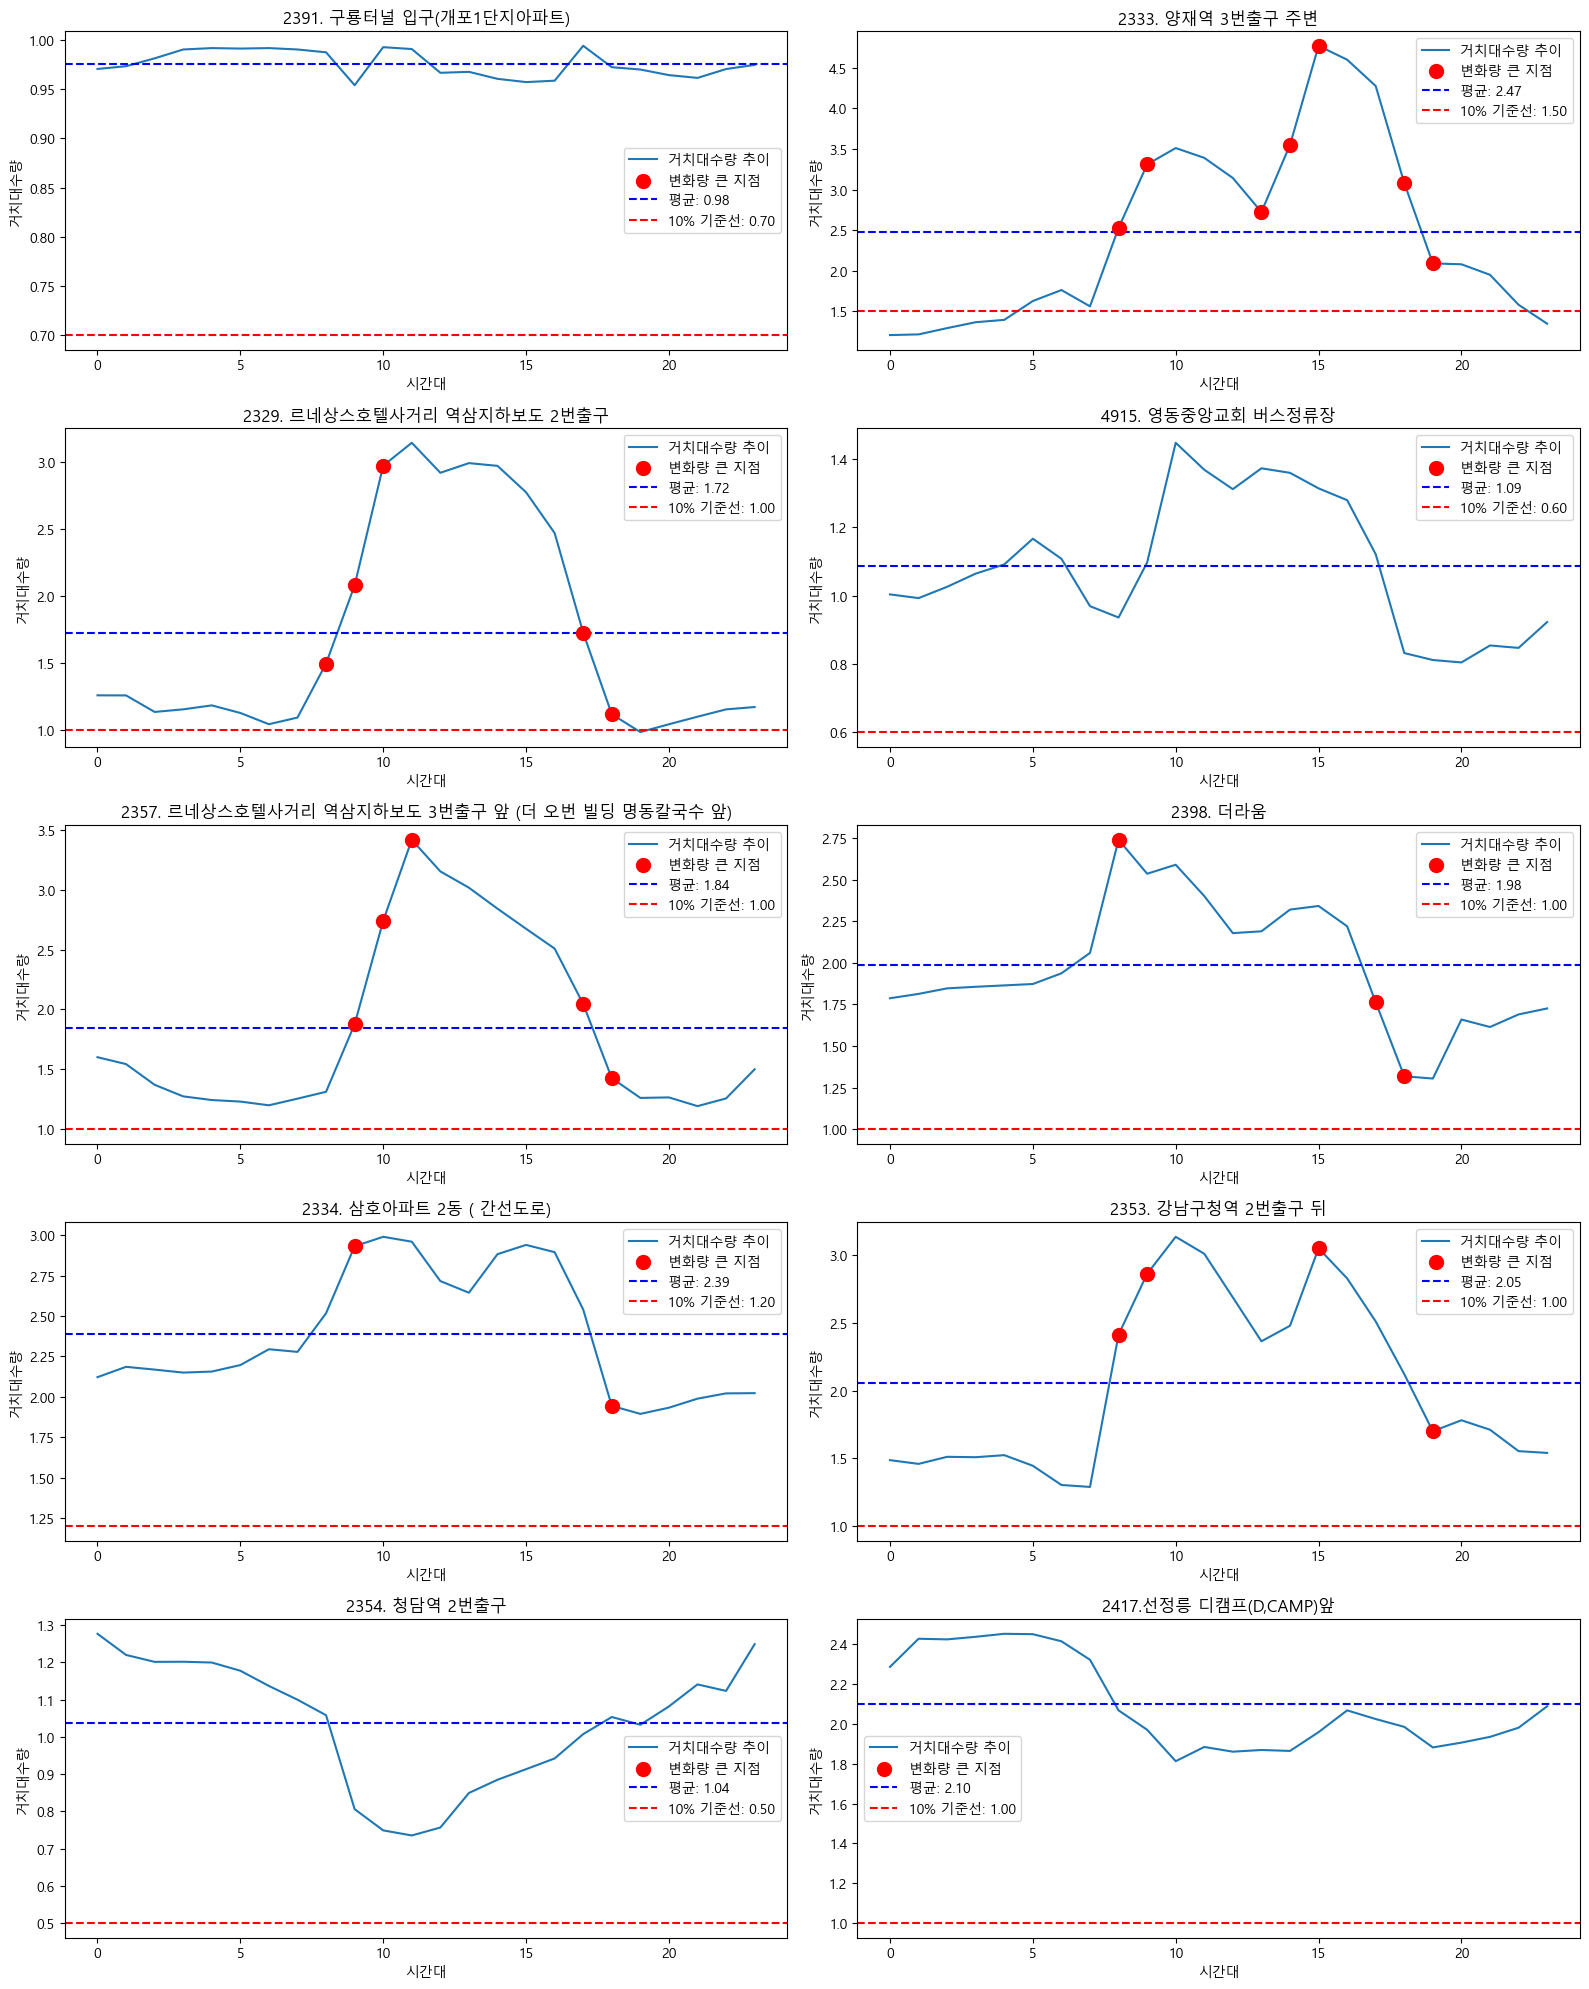

In [44]:

# 대여소 개수
num_places = len(places)
ncols = 2  # 가로 서브플롯 개수
nrows = math.ceil(num_places / ncols)  # 필요한 행의 개수 계산

# 서브플롯 생성
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()  # 2D 배열을 1D로 변환

# 서브플롯에 그래프 그리기
for idx, place in enumerate(places):
    # 데이터 필터링 및 복사
    plot_df = gangnamgu_df[gangnamgu_df['보관소(대여소)명'] == place].copy()
    plot_df["변화량"] = plot_df["거치대수량"].diff().fillna(0).abs()

    # 변화량 기준 초과 데이터
    threshold = 0.4
    highlight = plot_df[plot_df["변화량"] > threshold]

    # 현재 subplot 선택
    ax = axes[idx]

    # 그래프 생성
    sns.lineplot(data=plot_df, x='시간대', y='거치대수량', label='거치대수량 추이', ax=ax)

    # 강조점 추가
    ax.scatter(
        highlight["시간대"],
        highlight["거치대수량"],
        color="red",
        label="변화량 큰 지점",
        s=100,
        zorder=3
    )

    # y의 평균선 추가
    y_mean = plot_df["거치대수량"].mean()
    ax.axhline(y=y_mean, color="blue", linestyle="--", label=f'평균: {y_mean:.2f}')
    
    # 각 대여소별 거치대의 10% 고장 기준선 추가
    y_stand = plot_df['거치대수'].mean() / 10
    ax.axhline(y=y_stand, color="red", linestyle="--", label=f'10% 기준선: {y_stand:.2f}')
    
    # 스타일링
    ax.set_title(f'{place}', fontsize=12)
    ax.set_xlabel('시간대', fontsize=10)
    ax.set_ylabel('거치대수량', fontsize=10)
    ax.legend()

# 빈 subplot 처리 (대여소 개수가 nrows * ncols보다 작을 때)
for idx in range(len(places), len(axes)):
    fig.delaxes(axes[idx])

# 전체 레이아웃 조정 및 저장
plt.tight_layout()
plt.savefig("2023_구룡터널주변_사용지수_상위10_기준선추가.png", dpi=300)
plt.show()


## 번외) 대여소 두곳 그래프 따로 그리기
구룡터널, 양재역3번출구

In [26]:
top_2 = ['2333. 양재역 3번출구 주변']

In [27]:
top2_df = gangnamgu_df[gangnamgu_df['보관소(대여소)명'].isin(top_2)]

In [25]:
top1_df.to_csv("강남구_구룡터널_시각화데이터.csv", encoding='cp949')

In [28]:
top2_df.to_csv("강남구_양재역_시각화데이터.csv", encoding='cp949')